In [ ]:
import torch
x = torch.zeros(1, 3)
x.dtype, x.device

(torch.float32, device(type='cpu'))

In [ ]:
x = x.long()
x.dtype, x.device

(torch.int64, device(type='cpu'))

In [ ]:
x = x.to('cuda')
x.dtype, x.device

(torch.int64, device(type='cuda', index=0))

In [ ]:
x = torch.tensor([[1, 3, 0], [2, 4, 6]])
x.t()

tensor([[1, 2],
        [3, 4],
        [0, 6]])

In [ ]:
x.view(-1)

tensor([1, 3, 0, 2, 4, 6])

In [ ]:
x.view(3, -1)

tensor([[1, 3],
        [0, 2],
        [4, 6]])

In [ ]:
x.narrow(1, 0, 2)

tensor([[1, 3],
        [2, 4]])

In [ ]:
x.narrow(1, 1, 2)

tensor([[3, 0],
        [4, 6]])

In [ ]:
x.view(1, 2, 3).expand(3, 2, 3)

tensor([[[1, 3, 0],
         [2, 4, 6]],

        [[1, 3, 0],
         [2, 4, 6]],

        [[1, 3, 0],
         [2, 4, 6]]])

In [ ]:
x.view(-1).expand(3, -1)

tensor([[1, 3, 0, 2, 4, 6],
        [1, 3, 0, 2, 4, 6],
        [1, 3, 0, 2, 4, 6]])

In [ ]:
y = torch.tensor([[[1, 2, 1], [2, 1, 2]],[[3, 0, 3],[0, 3, 0]]])
y.size()

torch.Size([2, 2, 3])

In [ ]:
y.narrow(0, 1, 1)

tensor([[[3, 0, 3],
         [0, 3, 0]]])

In [ ]:
y.narrow(2, 0, 2)

tensor([[[1, 2],
         [2, 1]],

        [[3, 0],
         [0, 3]]])

In [ ]:
y.narrow(1, 0, 1)

tensor([[[1, 2, 1]],

        [[3, 0, 3]]])

In [ ]:
y.transpose(0, 1)

tensor([[[1, 2, 1],
         [3, 0, 3]],

        [[2, 1, 2],
         [0, 3, 0]]])

In [ ]:
y.transpose(0, 2)

tensor([[[1, 3],
         [2, 0]],

        [[2, 0],
         [1, 3]],

        [[1, 3],
         [2, 0]]])

In [ ]:
y.transpose(1, 1)

tensor([[[1, 2, 1],
         [2, 1, 2]],

        [[3, 0, 3],
         [0, 3, 0]]])

In [ ]:
y.transpose(1, 2)

tensor([[[1, 2],
         [2, 1],
         [1, 2]],

        [[3, 0],
         [0, 3],
         [3, 0]]])

In [ ]:
y.transpose(2, 1)

tensor([[[1, 2],
         [2, 1],
         [1, 2]],

        [[3, 0],
         [0, 3],
         [3, 0]]])

In [ ]:
import torch, torchvision
from google.colab import drive
drive.mount('/content/gdrive')
cifar = torchvision.datasets.CIFAR10('/content/gdrive/My Drive/withCoLab/dataset/cifar10/', train=True, download = True)
x = torch.from_numpy(cifar.data).transpose(1, 3).transpose(2, 3).float()
x = x/255
print(x.type(), x.size(), x.min().item(), x.max().item())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Files already downloaded and verified
torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


In [ ]:
y = torch.from_numpy(cifar.data).transpose(1, 2).transpose(0, 2).float()
print(y.type(), y.size(), y.min().item(), y.max().item())

torch.FloatTensor torch.Size([32, 32, 50000, 3]) 0.0 255.0


In [ ]:
x = x.narrow(0, 0, 48).float()
from PIL import Image

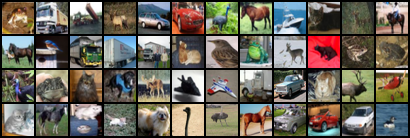

In [ ]:
torchvision.utils.save_image(x, 'cifar-4x12.png', nrow=12)
img = Image.open('cifar-4x12.png')
img

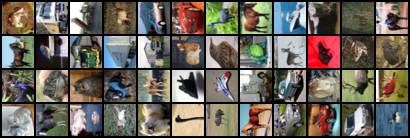

In [ ]:
x.transpose_(2, 3)
torchvision.utils.save_image(x, 'cifar-4x12-rotated.png', nrow = 12)
img = Image.open('cifar-4x12-rotated.png')
img

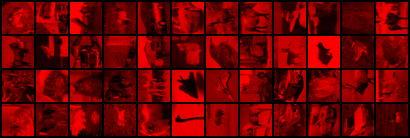

In [ ]:
x.narrow(1, 1, 2).fill_(0)
torchvision.utils.save_image(x, 'cifar-4x12-rotated-and-red.png', nrow=12)
img = Image.open('cifar-4x12-rotated-and-red.png')
img

In [ ]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
B = torch.tensor([[5., -5., 5., -5., 5.]])
C = A + B

In [ ]:
print(A)
print(B)
print(C)

tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[ 5., -5.,  5., -5.,  5.]])
tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])


In [2]:
import torch
x = torch.empty(100, 100)
x.stride()
x.view(-1)

tensor([2.4127e-36, 0.0000e+00, 2.8699e-42,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00])

In [4]:
y = x.t()
y.view(-1)

RuntimeError: ignored

In [5]:
y = x.t().contiguous()
y.size()

torch.Size([100, 100])

In [6]:
y.view(-1)

tensor([2.4127e-36, 2.0808e-36, 3.9262e-36,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00])

In [ ]:
x = torch.zeros(2, 4)
x.storage()

 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
[torch.FloatStorage of size 8]

In [ ]:
q = x.storage()
q[4] = 1.0
x

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [ ]:
y = x.view(2, 2, 2,)
y

tensor([[[0., 0.],
         [0., 0.]],

        [[1., 0.],
         [0., 0.]]])

In [ ]:
y[1, 1, 0] = 7.0
x

tensor([[0., 0., 0., 0.],
        [1., 0., 7., 0.]])

In [ ]:
y.narrow(0, 1, 1).fill_(3.0)

tensor([[[3., 3.],
         [3., 3.]]])

In [ ]:
x

tensor([[0., 0., 0., 0.],
        [3., 3., 3., 3.]])

In [ ]:
z = y.narrow(0, 1, 1)
z

tensor([[[3., 3.],
         [3., 3.]]])

In [ ]:
x

tensor([[0., 0., 0., 0.],
        [3., 3., 3., 3.]])

In [ ]:
y

tensor([[[0., 0.],
         [0., 0.]],

        [[3., 3.],
         [3., 3.]]])

In [ ]:
q = torch.arange(0, 20, dtype=torch.float).storage()
q.dtype

torch.float32

In [ ]:
x = torch.empty(0).set_(q, storage_offset= 5, size=(3, 2), stride=(4, 1))
x

tensor([[ 5.,  6.],
        [ 9., 10.],
        [13., 14.]])

In [ ]:
n = torch.linspace(1, 4, 4)
n

tensor([1., 2., 3., 4.])

In [ ]:
torch.tensor(0.).set_(n.storage(), 1, (3, 3), (0, 1))

tensor([[2., 3., 4.],
        [2., 3., 4.],
        [2., 3., 4.]])

In [ ]:
torch.tensor(0.).set_(n.storage(), 1, (2, 4), (1,0))

tensor([[2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [ ]:
import torch
A = torch.Tensor([[1, 1, 1],
                  [2, 3, 4],
                  [3, 5, 2],
                  [4, 2, 5],
                  [5, 4, 3]])
B = torch.Tensor([[-10, -3],
                  [12, 14],
                  [14, 12],
                  [16, 16],
                  [18, 16]])
X, _ = torch.lstsq(B, A)
X

tensor([[ 2.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  2.0000],
        [10.9635,  4.8501],
        [ 8.9332,  5.2418]])

In [ ]:
x = torch.tensor([[[1, 2, 1],
                   [2, 1, 2]], 
                  [[3, 0, 3],
                   [0, 3, 0]]])
y = x.transpose(0, 1)
y

tensor([[[1, 2, 1],
         [3, 0, 3]],

        [[2, 1, 2],
         [0, 3, 0]]])

In [ ]:
z = x.transpose(0, 2)
z

tensor([[[1, 3],
         [2, 0]],

        [[2, 0],
         [1, 3]],

        [[1, 3],
         [2, 0]]])